#CSSE COVID-19 Dataset

##เป็นข้อมูลสรุปรายงานการติดเชื้อ COVID-19 จากทั่วโลกตั้งแต่วันที่ 22 มกราคม 2020 ถึง 12 มีนาคม 2020


ประกอบด้วยไฟล์

*   time_series_covid19_confirmed_global.csv
*   time_series_covid19_deaths_global.csv
*   time_series_covid19_recovered_global.csv

##Field description
* **Province/State**: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* **Country/Region**: country/region name conforming to WHO (will be updated).
* **Confirmed**: the number of confirmed cases(accumulated).
* **Deaths**: the number of deaths(accumulated).
* **Recovered**: the number of recovered cases(accumulated).

**จากไฟล์จงทำการเขียนโปรแกรมเพื่อตอบคำถามต่อไปนี้**
1.   จงแสดงอัตราการรักษาหายของผู้ป่วยในสหภาพยุโรปทั้งหมดเป็นเปอร์เซ็นต์
2.   จงหา Country/Region ที่มียอดจำนวนผู้ติดเชื้อล่าสุดมากที่สุด 10 อันดับพร้อมพล็อตกราฟแสดงจำนวนผู้ติดเชื้อของแต่ละ Country/Region โดยเรียงลำดับจากมากไปน้อย (ไม่ต้องแยกเป็น Province/State)
3.   จงพล็อตกราฟเส้นเพื่อแสดง trend ยอดผู้ติดเชื้อในประเทศไทยในแต่ละสัปดาห์(กำหนดให้นับข้อมูลทุกวันอาทิตย์)
4.   จงหายอดผู้ติดเชื้อของ**แต่ละวัน**บนเรือไดม่อนพริ้นเซสพร้อมพล็อตกราฟ แล้วระบุวันที่มีการติดเชื้อมากที่สุด
5.   จงหา Country/Region ที่ล่าสุดมีเปอร์เซ็นต์อัตราการเสียชีวิตมากที่สุด 20 อันดับ พร้อมระบุว่า จาก Country/Region ในกลุ่มดังกล่าว ส่วนใหญ่อยู่ในทวีปอะไร
6.   จงหายอดผู้ป่วยที่กำลังรักษาตัวล่าสุด (สมมติว่ายังไม่เสียชีวิตหรือหายดี) ของแต่ละ Province/State ในประเทศจีน พร้อมพล็อตกราฟแสดงจำนวนในแต่ละ Province/State
7. ให้ผู้เรียนกำหนดโจทย์ขึ้นมาเองพร้อมเขียนโปรแกรมเพื่อหาคำตอบของโจทย์นั้น ๆ

##1.   จงแสดงอัตราการรักษาหายของผู้ป่วยในสหภาพยุโรปทั้งหมดเป็นเปอร์เซ็นต์

In [0]:
import pandas as pd

infected = pd.read_csv("time_series_covid19_confirmed_global.csv", delimiter=',',encoding='UTF8')
recovered = pd.read_csv("time_series_covid19_recovered_global.csv", delimiter=',',encoding='UTF8')
deaths = pd.read_csv("time_series_covid19_deaths_global.csv", delimiter=',',encoding='UTF8')

recovered.drop(['Lat', 'Long'], axis=1, inplace=True)
infected.drop(['Lat', 'Long'], axis=1, inplace=True)
deaths.drop(['Lat', 'Long'], axis=1, inplace=True)

In [0]:
EU=['Austria',
'Belgium',
'Bulgaria',
'Croatia',
'Cyprus',
'Czechia',
'Denmark',
'Estonia',
'Finland',
'France',
'Germany',
'Greece',
'Hungary',
'Ireland',
'Italy',
'Latvia',
'Lithuania',
'Luxembourg',
'Malta',
'Netherlands',
'Poland',
'Portugal',
'Romania',
'Slovakia',
'Slovenia',
'Spain',
'Sweden']
#Don't Forget BREXIT

In [0]:
recoveredbycountry = recovered.groupby(['Country/Region']).sum()
infectedbycountry = infected.groupby(['Country/Region']).sum()

num_recovered = recoveredbycountry.T[EU].tail(1).sum(axis=1)
num_infected = infectedbycountry.T[EU].tail(1).sum(axis=1)

print('อัตราการรักษาผู้ป่วยหายในสหภาพยุโรปคิดเป็น %.2f %%'%((num_recovered/num_infected)*100))

อัตราการรักษาผู้ป่วยหายในสหภาพยุโรปคิดเป็น 27.92 %


##2.   จงหา Country/Region ที่มียอดจำนวนผู้ติดเชื้อล่าสุดมากที่สุด 10 อันดับพร้อมพล็อตกราฟแสดงจำนวนผู้ติดเชื้อของแต่ละ Country/Region โดยเรียงลำดับจากมากไปน้อย (ไม่ต้องแยกเป็น Province/State)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

infectedbycountry = infected.groupby(['Country/Region']).sum()
topten = infectedbycountry.T
topten = topten.tail(1).T.nlargest(10,"4/12/20") #ref: https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html

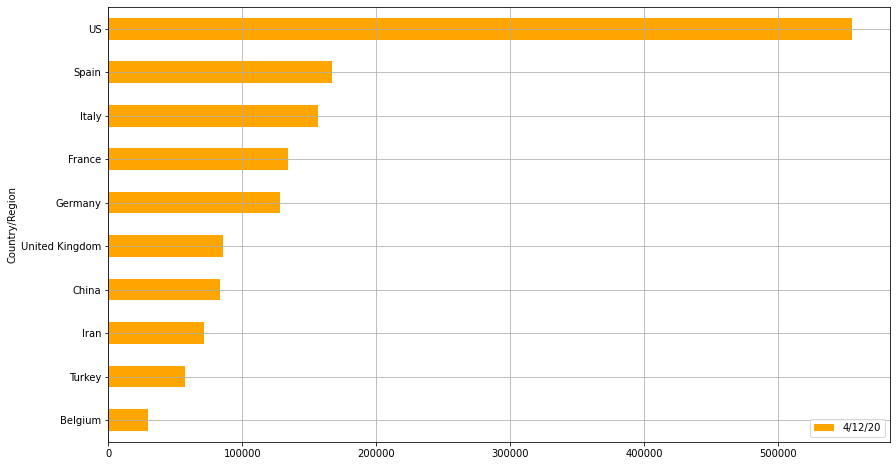

In [0]:
topten.plot.barh(figsize=(14, 8), rot=0, stacked=True, grid=True, color='orange').invert_yaxis()

##3.   จงพล็อตกราฟเส้นเพื่อแสดง trend ยอดผู้ติดเชื้อในประเทศไทยในแต่ละสัปดาห์(กำหนดให้นับข้อมูลทุกวันอาทิตย์)

In [0]:
infected_thailand = infected.groupby(['Country/Region']).sum().T['Thailand']

infected_thailand.index = pd.to_datetime(infected_thailand.index)
#use pandas datetime to manage datetime data ref : https://www.geeksforgeeks.org/python-pandas-to_datetime/

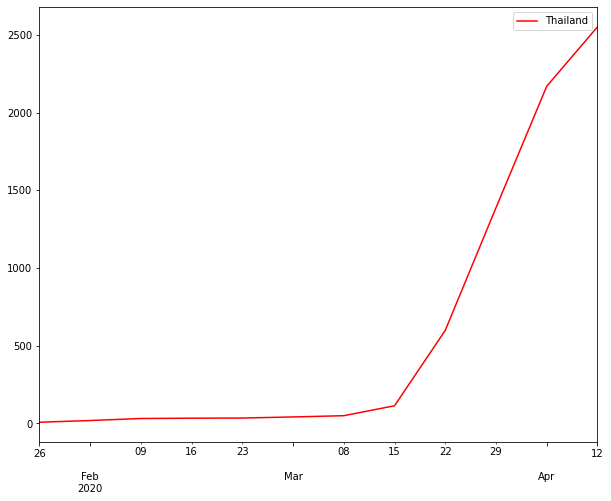

In [0]:
by_sunday = pd.DataFrame(infected_thailand)
by_sunday['day_of_week'] = by_sunday.index.dayofweek
by_sunday = by_sunday[by_sunday.day_of_week == 6] #The day of the week with Monday=0, Sunday=6 ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html
by_sunday.drop(['day_of_week'], axis=1, inplace=True)

by_sunday.plot(color='red',figsize=(10, 8))

##4.   จงหายอดผู้ติดเชื้อของ**แต่ละวัน**บนเรือไดม่อนพริ้นเซสพร้อมพล็อตกราฟ แล้วระบุวันที่มีการติดเชื้อมากที่สุด

In [0]:
infectedbycountry = infected.groupby(['Country/Region']).sum()
num_infected = infectedbycountry.T
num_infected.index = pd.to_datetime(num_infected.index)
num_infected['daily_infected'] = num_infected['Diamond Princess'].diff(1)

วันที่มีการติดเชื้อมากที่สุดคือ 2020-02-17 00:00:00


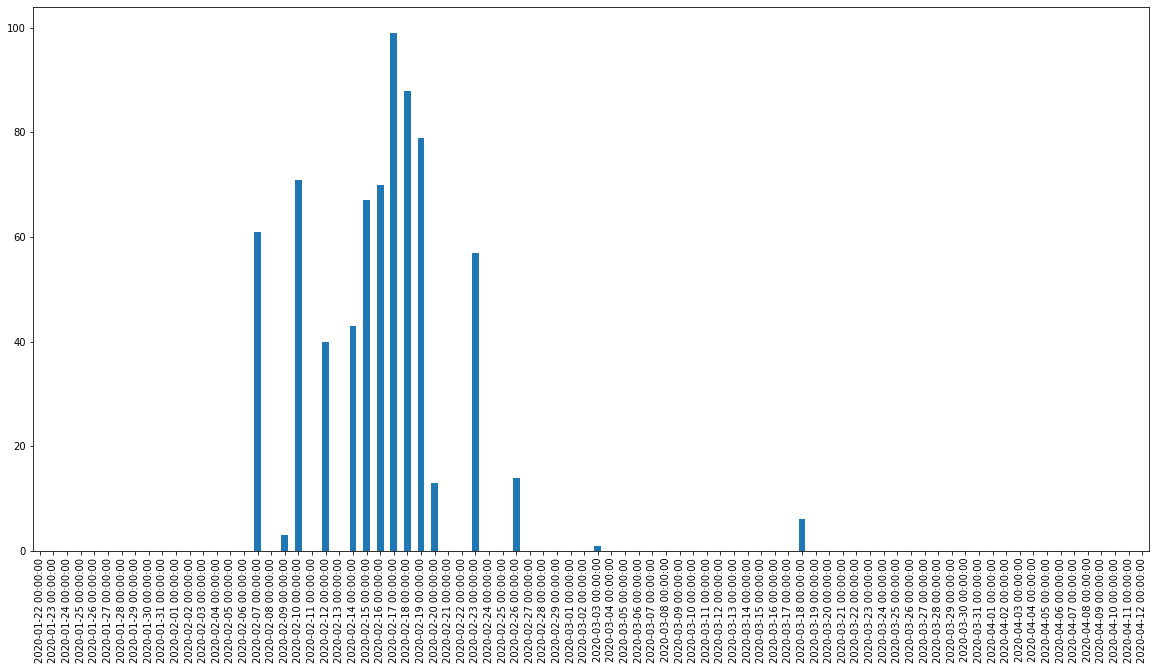

In [0]:
num_infected['daily_infected'].plot.bar(rot=90, figsize=(20, 10))
print('วันที่มีการติดเชื้อมากที่สุดคือ',num_infected['daily_infected'].idxmax())

##5.   จงหา Country/Region ที่ล่าสุดมีเปอร์เซ็นต์อัตราการเสียชีวิตมากที่สุด 20 อันดับ พร้อมระบุว่า จาก Country/Region ในกลุ่มดังกล่าว ส่วนใหญ่อยู่ในทวีปอะไร


In [0]:
deathsbycountry = deaths.groupby(['Country/Region']).sum()
infectedbycountry = infected.groupby(['Country/Region']).sum()

In [0]:
d = deathsbycountry.T.tail(1).T
i = infectedbycountry.T.tail(1).T

top_death = d.merge(i, how='outer', left_index=True, right_index=True, suffixes=('_death', '_infected'), sort=True)
# Merge two Dataframes on index of both the dataframes

In [0]:
top_death.rename(columns = {'4/12/20_death':'death', '4/12/20_infected':'infected'}, inplace = True) 
top_death['percent'] = ((top_death.death/top_death.infected)*100).round(4)

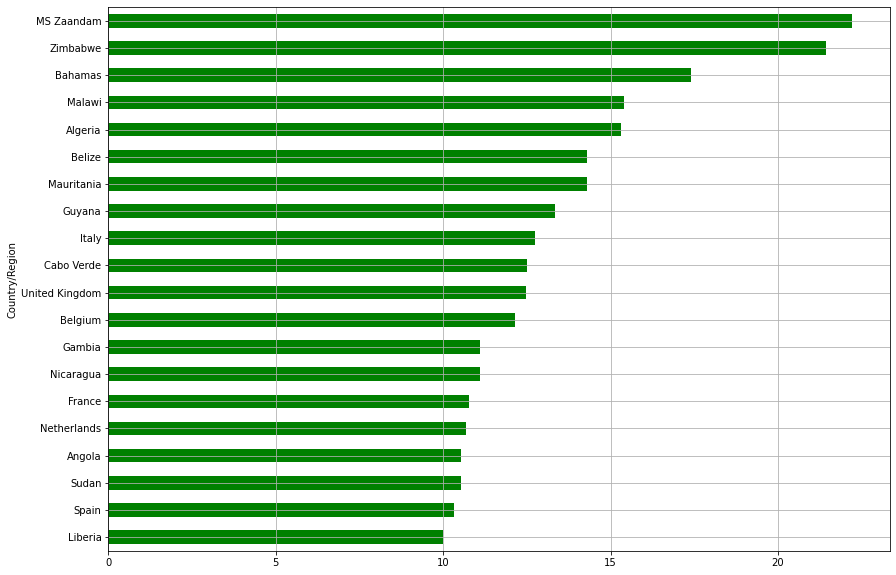

In [0]:
top_20 = top_death.nlargest(20, "percent")
top_20['percent'].plot.barh(figsize=(14, 10), rot=0, stacked=True, grid=True, color='green').invert_yaxis()

In [0]:
!pip install pycountry-convert -q
import pycountry_convert as pc

In [0]:
top_continent = top_20['percent']

num_continent = []
for index, row in top_continent.iteritems():

  if index == 'MS Zaandam':
    continue
  else:
    country_code = pc.country_name_to_country_alpha2(index, cn_name_format="default")
    continent = pc.country_alpha2_to_continent_code(country_code)
    num_continent.append(continent)

from collections import Counter
print(Counter(num_continent))
print("ส่วนใหญ่อยู่ในทวีป Africa")

Counter({'AF': 9, 'EU': 6, 'NA': 3, 'SA': 1})
ส่วนใหญ่อยู่ในทวีป Africa


##6.   จงหายอดผู้ป่วยที่กำลังรักษาตัวล่าสุด (สมมติว่ายังไม่เสียชีวิตหรือหายดี) ของแต่ละ Province/State ในประเทศจีน พร้อมพล็อตกราฟแสดงจำนวนในแต่ละ Province/State

In [0]:
deathsbycountry = deaths.groupby(['Country/Region','Province/State']).sum()
recoveredbycountry = recovered.groupby(['Country/Region','Province/State']).sum()
infectedbycountry = infected.groupby(['Country/Region','Province/State']).sum()

In [0]:
d = deathsbycountry.T.tail(1).T
i = infectedbycountry.T.tail(1).T
r = recoveredbycountry.T.tail(1).T
patient = [i,r,d]
patient = pd.concat(patient, axis=1)
patient.columns = ['infected','recovered','death']
patient['patient'] = patient.infected-(patient.death+patient.recovered).round()
china = patient.loc[['China'], : ]
china

infected  recovered  death  patient
Country/Region Province/State                                     
China          Anhui                991      984.0      6      1.0
               Beijing              589      479.0      8    102.0
               Chongqing            579      570.0      6      3.0
               Fujian               352      321.0      1     30.0
               Gansu                139      135.0      2      2.0
               Guangdong           1552     1443.0      8    101.0
               Guangxi              254      252.0      2      0.0
               Guizhou              146      144.0      2      0.0
               Hainan               168      162.0      6      0.0
               Hebei                327      313.0      6      8.0
               Heilongjiang         684      470.0     13    201.0
               Henan               1276     1253.0     22      1.0
               Hong Kong           1004      360.0      4    640.0
               Hubei              67803    64281.0   3219    303.0
               Hunan               1019     1014.0      4      1.0
               Inner Mongolia       189       83.0      1    105.0
               Jiangsu              653      638.0      0     15.0
               Jiangxi              937      936.0      1      0.0
               Jilin                 99       96.0      1      2.0
               Liaoning             145      136.0      2      7.0
               Macau                 45       13.0      0     32.0
               Ningxia               75       75.0      0      0.0
               Qinghai               18       18.0      0      0.0
               Shaanxi              256      248.0      3      5.0
               Shandong             784      757.0      7     20.0
               Shanghai             607      446.0      7    154.0
               Shanxi               172      135.0      0     37.0
               Sichuan              560      547.0      3     10.0
               Tianjin              183      161.0      3     19.0
               Tibet                  1        1.0      0      0.0
               Xinjiang              76       73.0      3      0.0
               Yunnan               184      174.0      2      8.0
               Zhejiang            1267     1238.0      1     28.0

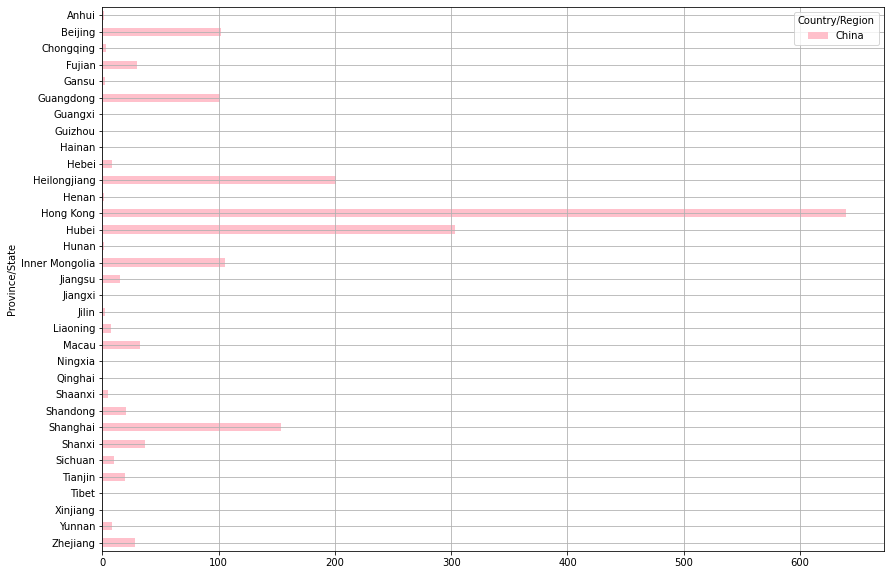

In [0]:
china.unstack(level=0)['patient'].plot.barh(figsize=(14, 10), rot=0, stacked=True, grid=True, color='pink').invert_yaxis()

##7. ให้ผู้เรียนกำหนดโจทย์ขึ้นมาเองพร้อมเขียนโปรแกรมเพื่อหาคำตอบของโจทย์นั้น ๆ (Optional)

In [0]:
#Solution